In [94]:
# imports
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import re


# League Records

import league records gathered

In [21]:
path = '.' 

# Use glob to get all Excel files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Create an empty list to store DataFrames
dataframes = {}

# Loop through each file and read it into a DataFrame
for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file)
    season = os.path.basename(file).split('.')[0]  # Extract season from filename
    df['season'] = season
 # Store the DataFrame in the dictionary with the season as the key
    dataframes[season] = df

# Display the keys of the dictionary to verify the DataFrames have been loaded
dataframes.keys()








dict_keys(['League per game def stats 2020', 'League total def stats 2023', 'League total def stats 2022', 'League total def stats 2020', 'League total def stats 2021', 'League total def stats 2019', 'League per game def stats 2019', 'League per game def stats 2021 ', 'League per game def stats 2022 ', 'League per game off stats 2019', 'League total off stats 2019', 'League advanced stats 2019', 'League advanced stats 2021', 'League total off stats 2021', 'League per game off stats 2022', 'League per game off stats 2023', 'League total off stats 2020', 'League advanced stats 2020', 'League advanced stats 2022', 'League total off stats 2022', 'League per game off stats 2021', 'League per game off stats 2020', 'League per game def stats 2023 ', 'League total off stats 2023', 'League advanced stats 2023'])

In [36]:
# Filter dataframes for files with names including 'League advanced stats'
filtered_dataframes1 = {key: df for key, df in dataframes.items() if 'League advanced stats' in key}

# Concatenate the filtered DataFrames into a single DataFrame
League_advanced_stats_df = pd.concat(filtered_dataframes1.values(), ignore_index=True)

# Display the concatenated DataFrame
League_advanced_stats_df.head()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G,season
0,1.0,Milwaukee Bucks*,29.2,56.0,17.0,57,16,10.08,-0.67,9.41,...,NaN,0.489,12.0,81.6,0.178,NaN,Fiserv Forum,"549,036","17,711",League advanced stats 2019
1,2.0,Boston Celtics*,25.3,48.0,24.0,50,22,6.31,-0.47,5.83,...,NaN,0.509,13.5,77.4,0.215,NaN,TD Garden,"610,864","19,090",League advanced stats 2019
2,3.0,Los Angeles Clippers*,27.4,49.0,23.0,50,22,6.44,0.21,6.66,...,NaN,0.506,12.2,77.6,0.206,NaN,STAPLES Center,"610,176","19,068",League advanced stats 2019
3,4.0,Toronto Raptors*,26.6,53.0,19.0,50,22,6.24,-0.26,5.97,...,NaN,0.502,14.6,76.7,0.202,NaN,Scotiabank Arena,"633,456","19,796",League advanced stats 2019
4,5.0,Los Angeles Lakers*,29.5,52.0,19.0,48,23,5.79,0.49,6.28,...,NaN,0.515,14.1,78.8,0.205,NaN,STAPLES Center,"588,907","18,997",League advanced stats 2019


In [35]:
# Filter dataframes for files with names including 'League per game off stats'
filtered_dataframes2 = {key: df for key, df in dataframes.items() if 'League per game off stats' in key}

# Concatenate the filtered DataFrames into a single DataFrame
League_off_stats_per_game_df = pd.concat(filtered_dataframes2.values(), ignore_index=True)

# Display the concatenated DataFrame
League_off_stats_per_game_df.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season,FGA▼
0,1.0,Milwaukee Bucks*,73,241.0,43.3,90.9,0.476,13.8,38.9,0.355,...,42.2,51.7,25.9,7.2,5.9,15.1,19.6,118.7,League per game off stats 2019,NaN
1,2.0,Houston Rockets*,72,241.4,40.8,90.4,0.451,15.6,45.3,0.345,...,34.5,44.3,21.6,8.7,5.2,14.7,21.8,117.8,League per game off stats 2019,NaN
2,3.0,Dallas Mavericks*,75,242.3,41.7,90.3,0.461,15.1,41.3,0.367,...,36.4,46.9,24.7,6.1,4.8,12.7,19.5,117.0,League per game off stats 2019,NaN
3,4.0,Los Angeles Clippers*,72,241.4,41.6,89.2,0.466,12.4,33.5,0.371,...,37.0,47.7,23.7,7.1,4.7,14.6,22.1,116.3,League per game off stats 2019,NaN
4,5.0,New Orleans Pelicans,72,242.1,42.6,91.6,0.465,13.6,36.9,0.370,...,35.4,46.5,26.8,7.5,5.0,16.4,21.2,115.8,League per game off stats 2019,NaN


In [38]:
# Filter dataframes for files with names including 'League per game def stats'
filtered_dataframes3 = {key: df for key, df in dataframes.items() if 'League per game def stats' in key}

# Concatenate the filtered DataFrames into a single DataFrame
League_def_stats_per_game_df = pd.concat(filtered_dataframes3.values(), ignore_index=True)

# Display the concatenated DataFrame
League_def_stats_per_game_df.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
0,1.0,New York Knicks*,72,242.1,37.9,86.2,0.440,12.0,35.6,0.337,...,9.7,34.4,44.1,23.6,6.6,5.4,12.8,17.9,104.7,League per game def stats 2020
1,2.0,Los Angeles Lakers*,72,242.4,39.8,86.4,0.460,11.4,32.2,0.352,...,8.8,33.2,42.0,24.7,8.2,4.5,15.2,21.3,106.8,League per game def stats 2020
2,3.0,Utah Jazz*,72,241.0,40.9,91.4,0.447,10.9,31.8,0.341,...,9.8,32.8,42.6,22.3,7.7,3.9,11.5,19.0,107.2,League per game def stats 2020
3,4.0,Los Angeles Clippers*,72,240.0,40.1,86.4,0.464,11.6,32.5,0.356,...,9.2,32.0,41.2,22.9,7.1,4.2,12.8,18.1,107.8,League per game def stats 2020
4,5.0,Miami Heat*,72,241.4,39.1,85.2,0.459,14.3,39.1,0.365,...,9.5,33.4,42.9,25.8,7.5,4.0,15.1,19.6,108.0,League per game def stats 2020


# Data Cleaning

In [45]:
# Check for columns with null value
null_counts1 = League_advanced_stats_df.isnull().sum()
advanced_stats_null = null_counts1[null_counts1>0]
advanced_stats_null

Rk               5
W                5
L                5
NRtg             5
Unnamed: 17    155
Unnamed: 22    155
Unnamed: 27    155
Arena            5
Attend.          4
Attend./G        4
dtype: int64

In [42]:
# Check for null value

columns_with_null1 = League_advanced_stats_df.columns[League_advanced_stats_df.isnull().any()]

League_advanced_stats_df[columns_with_null1]


,Rk,W,L,NRtg,Unnamed: 17,Unnamed: 22,Unnamed: 27,Arena,Attend.,Attend./G
0,1.0,56.0,17.0,9.5,NaN,NaN,NaN,Fiserv Forum,"549,036","17,711"
1,2.0,48.0,24.0,6.3,NaN,NaN,NaN,TD Garden,"610,864","19,090"
2,3.0,49.0,23.0,6.3,NaN,NaN,NaN,STAPLES Center,"610,176","19,068"
3,4.0,53.0,19.0,6.1,NaN,NaN,NaN,Scotiabank Arena,"633,456","19,796"
4,5.0,52.0,19.0,5.7,NaN,NaN,NaN,STAPLES Center,"588,907","18,997"
...,...,...,...,...,...,...,...,...,...,...
150,27.0,14.0,68.0,-9.1,NaN,NaN,NaN,Little Caesars Arena,"726,378","18,159"
151,28.0,15.0,67.0,-9.1,NaN,NaN,NaN,Capital One Arena,"692,851","16,899"
152,29.0,21.0,61.0,-9.2,NaN,NaN,NaN,Moda Center,"751,395","18,327"
153,30.0,21.0,61.0,-10.5,NaN,NaN,NaN,Spectrum Center,"674,400","16,449"


In [97]:
# Function to extract year from season column
def extract_year(season_str):
    return re.search(r'\d{4}', season_str).group(0)

In [124]:
# Drop all the columns filled with null values
League_advanced_stats_df_cleaned = League_advanced_stats_df.drop(['Unnamed: 17', 'Unnamed: 22', 'Unnamed: 27'], axis=1)
# Remove commas from the 'Attend.' and 'Attend./G' column and replace with an empty string
League_advanced_stats_df_cleaned['Attend.'] = League_advanced_stats_df_cleaned['Attend.'].str.replace(',', '')
League_advanced_stats_df_cleaned['Attend./G'] = League_advanced_stats_df_cleaned['Attend./G'].str.replace(',', '')
# Convert the 'Attend.' and 'Attend./G' column to numeric, forcing errors to NaN
League_advanced_stats_df_cleaned['Attend.'] = pd.to_numeric(League_advanced_stats_df_cleaned['Attend.'], errors='coerce')
League_advanced_stats_df_cleaned['Attend./G'] = pd.to_numeric(League_advanced_stats_df_cleaned['Attend./G'], errors='coerce')
# fill the nan value in Attend. and Attend./G with the average value because it is not determined
League_Attend_Average = League_advanced_stats_df_cleaned['Attend.'].mean()
League_advanced_stats_df_cleaned['Attend.']=League_advanced_stats_df_cleaned['Attend.'].fillna(League_Attend_Average)
League_AttendG_Average = League_advanced_stats_df_cleaned['Attend.'].mean()
League_advanced_stats_df_cleaned['Attend./G']=League_advanced_stats_df_cleaned['Attend./G'].fillna(League_AttendG_Average)
# add year for final combined dataframe
League_advanced_stats_df_cleaned['season_year'] = League_advanced_stats_df_cleaned['season'].apply(extract_year)
# Remove '*' from all the team names
# Remove asterisks from team names in the 'Team' column
League_advanced_stats_df_cleaned['Team'] = League_advanced_stats_df_cleaned['Team'].str.replace('*', '', regex=False)
# Drop all the rows with null values since it is the league average and there is no need to include it in the analysis while we have team data
League_advanced_stats_df_cleaned = League_advanced_stats_df_cleaned.dropna()
League_advanced_stats_df_cleaned.head()


,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G,season,season_year
0,1.0,Milwaukee Bucks,29.2,56.0,17.0,57,16,10.08,-0.67,9.41,...,0.201,0.489,12.0,81.6,0.178,Fiserv Forum,549036.0,17711.0,League advanced stats 2019,2019
1,2.0,Boston Celtics,25.3,48.0,24.0,50,22,6.31,-0.47,5.83,...,0.207,0.509,13.5,77.4,0.215,TD Garden,610864.0,19090.0,League advanced stats 2019,2019
2,3.0,Los Angeles Clippers,27.4,49.0,23.0,50,22,6.44,0.21,6.66,...,0.233,0.506,12.2,77.6,0.206,STAPLES Center,610176.0,19068.0,League advanced stats 2019,2019
3,4.0,Toronto Raptors,26.6,53.0,19.0,50,22,6.24,-0.26,5.97,...,0.210,0.502,14.6,76.7,0.202,Scotiabank Arena,633456.0,19796.0,League advanced stats 2019,2019
4,5.0,Los Angeles Lakers,29.5,52.0,19.0,48,23,5.79,0.49,6.28,...,0.201,0.515,14.1,78.8,0.205,STAPLES Center,588907.0,18997.0,League advanced stats 2019,2019


In [50]:
# Check for columns with null value
null_counts2 = League_off_stats_per_game_df.isnull().sum()
off_stats_null = null_counts2[null_counts2>0]
off_stats_null

Rk        5
FGA      31
FGA▼    124
dtype: int64

In [51]:
# Check for null value

columns_with_null2 = League_off_stats_per_game_df.columns[League_off_stats_per_game_df.isnull().any()]

League_off_stats_per_game_df[columns_with_null2]

,Rk,FGA,FGA▼
0,1.0,90.9,NaN
1,2.0,90.4,NaN
2,3.0,90.3,NaN
3,4.0,89.2,NaN
4,5.0,91.6,NaN
...,...,...,...
150,27.0,NaN,86.1
151,28.0,NaN,85.8
152,29.0,NaN,85.6
153,30.0,NaN,83.7


In [125]:
# fill the nan value in FGA with the value in FGA▼
League_off_stats_per_game_df['FGA']=League_off_stats_per_game_df['FGA'].fillna(League_off_stats_per_game_df['FGA▼'])
# drop column FGA▼
League_off_stats_per_game_df_cleaned = League_off_stats_per_game_df.drop(['FGA▼'], axis=1)
# drop all the rows with null values since it is the league average and there is no need to include it in the analysis while we have team data
League_off_stats_per_game_df_cleaned = League_off_stats_per_game_df_cleaned.dropna()
# add year for final combined dataframe
League_off_stats_per_game_df_cleaned['season_year'] = League_off_stats_per_game_df_cleaned['season'].apply(extract_year)
# add '.o' to each columns to distinguish from the def stats
League_off_stats_per_game_df_cleaned = League_off_stats_per_game_df_cleaned.add_suffix('.o')
# Remove '.o' from certain columns
League_off_stats_per_game_df_cleaned = League_off_stats_per_game_df_cleaned.rename(columns={'Team.o': 'Team', 'season.o': 'season', 'season_year.o': 'season_year'})
# Remove asterisks from team names in the 'Team' column
League_off_stats_per_game_df_cleaned['Team'] = League_off_stats_per_game_df_cleaned['Team'].str.replace('*', '', regex=False)
League_off_stats_per_game_df_cleaned.head()

,Rk.o,Team,G.o,MP.o,FG.o,FGA.o,FG%.o,3P.o,3PA.o,3P%.o,...,DRB.o,TRB.o,AST.o,STL.o,BLK.o,TOV.o,PF.o,PTS.o,season,season_year
0,1.0,Milwaukee Bucks,73,241.0,43.3,90.9,0.476,13.8,38.9,0.355,...,42.2,51.7,25.9,7.2,5.9,15.1,19.6,118.7,League per game off stats 2019,2019
1,2.0,Houston Rockets,72,241.4,40.8,90.4,0.451,15.6,45.3,0.345,...,34.5,44.3,21.6,8.7,5.2,14.7,21.8,117.8,League per game off stats 2019,2019
2,3.0,Dallas Mavericks,75,242.3,41.7,90.3,0.461,15.1,41.3,0.367,...,36.4,46.9,24.7,6.1,4.8,12.7,19.5,117.0,League per game off stats 2019,2019
3,4.0,Los Angeles Clippers,72,241.4,41.6,89.2,0.466,12.4,33.5,0.371,...,37.0,47.7,23.7,7.1,4.7,14.6,22.1,116.3,League per game off stats 2019,2019
4,5.0,New Orleans Pelicans,72,242.1,42.6,91.6,0.465,13.6,36.9,0.370,...,35.4,46.5,26.8,7.5,5.0,16.4,21.2,115.8,League per game off stats 2019,2019


In [57]:
# Check for columns with null value
null_counts3 = League_def_stats_per_game_df.isnull().sum()
off_stats_null = null_counts3[null_counts3>0]
off_stats_null

Rk    5
dtype: int64

In [58]:
# Check for null value

columns_with_null3 = League_def_stats_per_game_df.columns[League_def_stats_per_game_df.isnull().any()]

League_def_stats_per_game_df[columns_with_null3]

,Rk
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
...,...
150,27.0
151,28.0
152,29.0
153,30.0


In [126]:
# drop all the rows with null values since it is the league average and there is no need to include it in the analysis while we have team data
League_def_stats_per_game_df_cleaned = League_def_stats_per_game_df.dropna()
# add year for final combined dataframe
League_def_stats_per_game_df_cleaned['season_year'] = League_def_stats_per_game_df_cleaned['season'].apply(extract_year)
# add '.d' to each columns to distinguish from the off stats
League_def_stats_per_game_df_cleaned = League_def_stats_per_game_df_cleaned.add_suffix('.d')
# Remove '.d' from certain columns
League_def_stats_per_game_df_cleaned = League_def_stats_per_game_df_cleaned.rename(columns={'Team.d': 'Team', 'season.d': 'season', 'season_year.d': 'season_year'})
# Remove asterisks from team names in the 'Team' column
League_def_stats_per_game_df_cleaned['Team'] = League_def_stats_per_game_df_cleaned['Team'].str.replace('*', '', regex=False)
League_def_stats_per_game_df_cleaned.head()

/var/folders/z_/tg0n590j7tn1rh9n_j6hrkcr0000gn/T/ipykernel_1574/1256400151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  League_def_stats_per_game_df_cleaned['season_year'] = League_def_stats_per_game_df_cleaned['season'].apply(extract_year)


,Rk.d,Team,G.d,MP.d,FG.d,FGA.d,FG%.d,3P.d,3PA.d,3P%.d,...,DRB.d,TRB.d,AST.d,STL.d,BLK.d,TOV.d,PF.d,PTS.d,season,season_year
0,1.0,New York Knicks,72,242.1,37.9,86.2,0.440,12.0,35.6,0.337,...,34.4,44.1,23.6,6.6,5.4,12.8,17.9,104.7,League per game def stats 2020,2020
1,2.0,Los Angeles Lakers,72,242.4,39.8,86.4,0.460,11.4,32.2,0.352,...,33.2,42.0,24.7,8.2,4.5,15.2,21.3,106.8,League per game def stats 2020,2020
2,3.0,Utah Jazz,72,241.0,40.9,91.4,0.447,10.9,31.8,0.341,...,32.8,42.6,22.3,7.7,3.9,11.5,19.0,107.2,League per game def stats 2020,2020
3,4.0,Los Angeles Clippers,72,240.0,40.1,86.4,0.464,11.6,32.5,0.356,...,32.0,41.2,22.9,7.1,4.2,12.8,18.1,107.8,League per game def stats 2020,2020
4,5.0,Miami Heat,72,241.4,39.1,85.2,0.459,14.3,39.1,0.365,...,33.4,42.9,25.8,7.5,4.0,15.1,19.6,108.0,League per game def stats 2020,2020


# Combine dataframes

In [127]:
# Merge adv_stats and off_stats on 'Team' and 'season_year'
NBA_df = pd.merge(League_advanced_stats_df_cleaned, League_off_stats_per_game_df_cleaned, on=['Team', 'season_year'])

# Merge the resulting DataFrame with def_stats on 'Team' and 'season_year'
NBA_df = pd.merge(NBA_df, League_def_stats_per_game_df_cleaned, on=['Team', 'season_year'])
NBA_df


,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,ORB.d,DRB.d,TRB.d,AST.d,STL.d,BLK.d,TOV.d,PF.d,PTS.d,season
0,1.0,Milwaukee Bucks,29.2,56.0,17.0,57,16,10.08,-0.67,9.41,...,9.5,36.3,45.8,24.2,7.4,4.5,14.1,21.7,108.6,League per game def stats 2019
1,2.0,Boston Celtics,25.3,48.0,24.0,50,22,6.31,-0.47,5.83,...,10.3,34.0,44.3,22.4,7.1,5.5,15.2,20.7,107.3,League per game def stats 2019
2,3.0,Los Angeles Clippers,27.4,49.0,23.0,50,22,6.44,0.21,6.66,...,10.7,34.6,45.3,23.7,7.5,4.7,14.1,22.9,109.9,League per game def stats 2019
3,4.0,Toronto Raptors,26.6,53.0,19.0,50,22,6.24,-0.26,5.97,...,10.9,35.1,46.1,25.6,7.2,5.5,16.8,20.4,106.5,League per game def stats 2019
4,5.0,Los Angeles Lakers,29.5,52.0,19.0,48,23,5.79,0.49,6.28,...,9.4,32.9,42.3,23.4,8.2,3.7,15.9,21.7,107.6,League per game def stats 2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26.0,Memphis Grizzlies,24.4,27.0,55.0,24,58,-7.00,0.43,-6.57,...,10.7,35.0,45.6,26.6,8.1,6.5,15.1,18.8,112.8,League per game def stats 2023
146,27.0,Detroit Pistons,23.8,14.0,68.0,20,62,-9.11,0.05,-9.06,...,9.6,33.5,43.1,27.0,8.9,6.0,12.4,17.8,119.0,League per game def stats 2023
147,28.0,Washington Wizards,24.9,15.0,67.0,20,62,-9.29,0.00,-9.29,...,12.1,36.8,48.9,29.0,8.0,6.0,14.0,18.0,123.0,League per game def stats 2023
148,29.0,Portland Trail Blazers,24.1,21.0,61.0,20,62,-9.02,0.74,-8.29,...,10.6,33.2,43.8,27.1,8.9,6.4,14.3,17.9,115.4,League per game def stats 2023


In [128]:
# Check for columns with null value
null_counts4 = NBA_df.isnull().sum()
NBA_null = null_counts4[null_counts4>0]
NBA_null
# No null value means all data frames are successfully combined

Series([], dtype: int64)

# EDA

In [129]:
NBA_df.describe()

,Rk,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,...,FT%.d,ORB.d,DRB.d,TRB.d,AST.d,STL.d,BLK.d,TOV.d,PF.d,PTS.d
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,15.500000,26.132667,38.860000,38.860000,38.980000,38.740000,-0.032067,-0.000467,-0.032467,112.983333,...,0.778153,10.250667,33.867333,44.114000,25.172667,7.524000,4.854000,13.970667,19.681333,112.687333
std,8.684438,1.758259,11.606542,11.181859,11.444919,11.013981,4.805355,0.304444,4.659786,3.716125,...,0.012879,0.743721,1.548045,1.823781,1.479611,0.678696,0.665106,1.194481,1.172755,4.009022
min,1.000000,22.100000,14.000000,17.000000,15.000000,16.000000,-10.640000,-0.930000,-10.130000,103.500000,...,0.745000,8.600000,30.400000,39.900000,21.500000,6.000000,3.600000,11.500000,17.300000,104.500000
25%,8.000000,24.825000,31.000000,31.000000,32.000000,31.250000,-3.072500,-0.180000,-3.065000,110.625000,...,0.769250,9.700000,32.900000,42.700000,24.125000,7.000000,4.400000,13.100000,18.800000,109.825000
50%,15.500000,26.050000,41.500000,38.000000,41.000000,37.000000,0.815000,-0.005000,0.995000,113.200000,...,0.778500,10.200000,33.700000,44.050000,25.150000,7.500000,4.800000,13.900000,19.650000,112.500000
75%,23.000000,27.400000,47.750000,46.000000,47.750000,45.750000,2.957500,0.177500,2.770000,115.500000,...,0.787000,10.700000,34.900000,45.300000,26.100000,7.975000,5.300000,14.775000,20.400000,115.275000
max,30.000000,30.400000,64.000000,68.000000,66.000000,64.000000,11.340000,0.740000,10.750000,123.200000,...,0.807000,12.100000,37.700000,48.900000,29.800000,9.500000,6.500000,18.300000,22.900000,123.100000


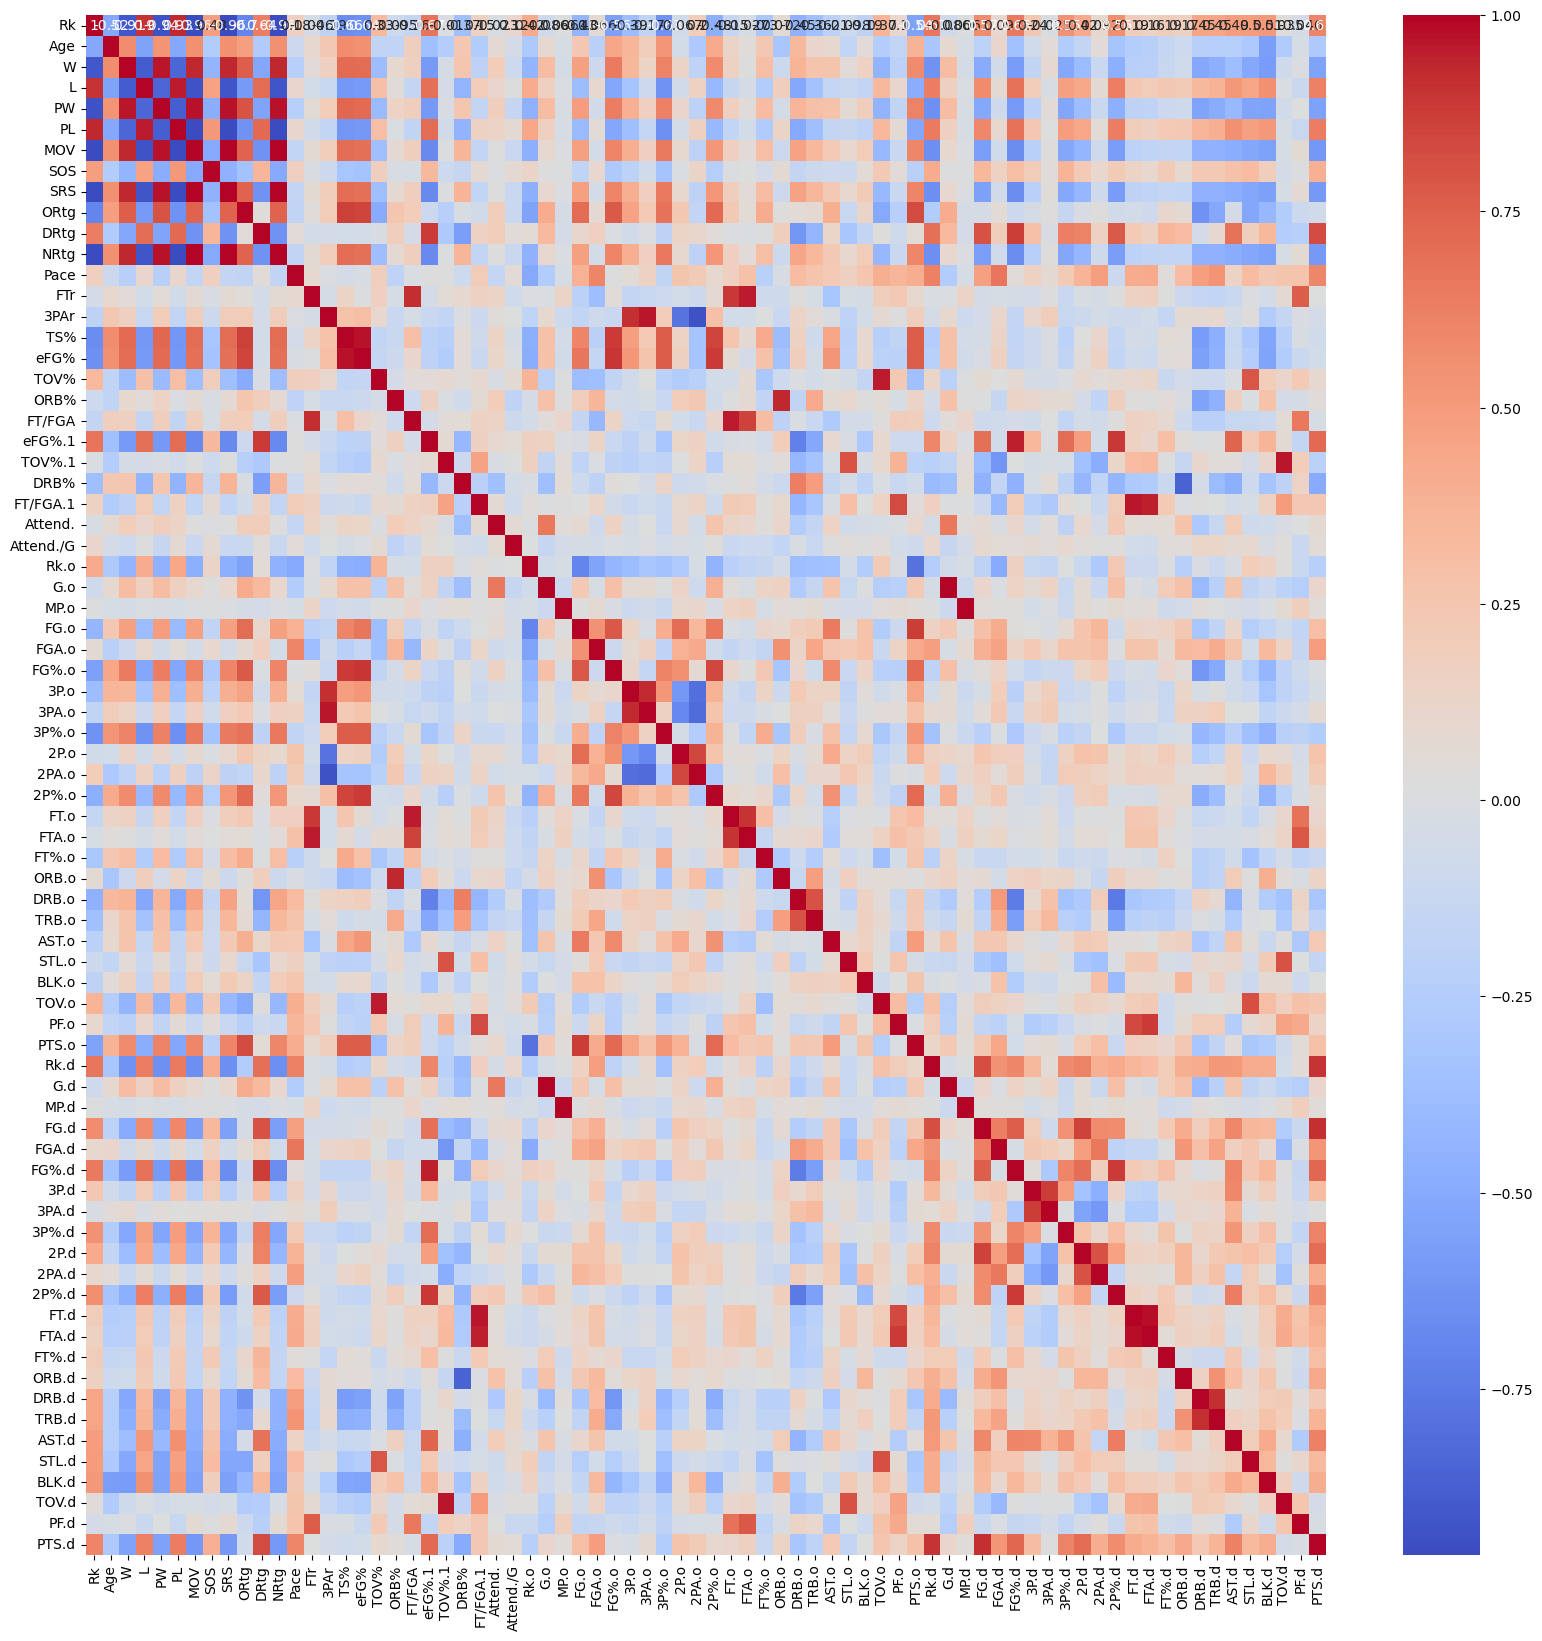

In [130]:
# Select only the columns with numeric value
numeric_df = NBA_df.select_dtypes(include=[float, int])
# Plot correlation heatmap
corr = numeric_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Below is a heatmap of all the columns and the correlations between each column. It is as expected that some of the stats that are very much related has showed possitive correlation such as wins and Nrtg 
# which stands for net rating for the point differential per 100 possessions.  


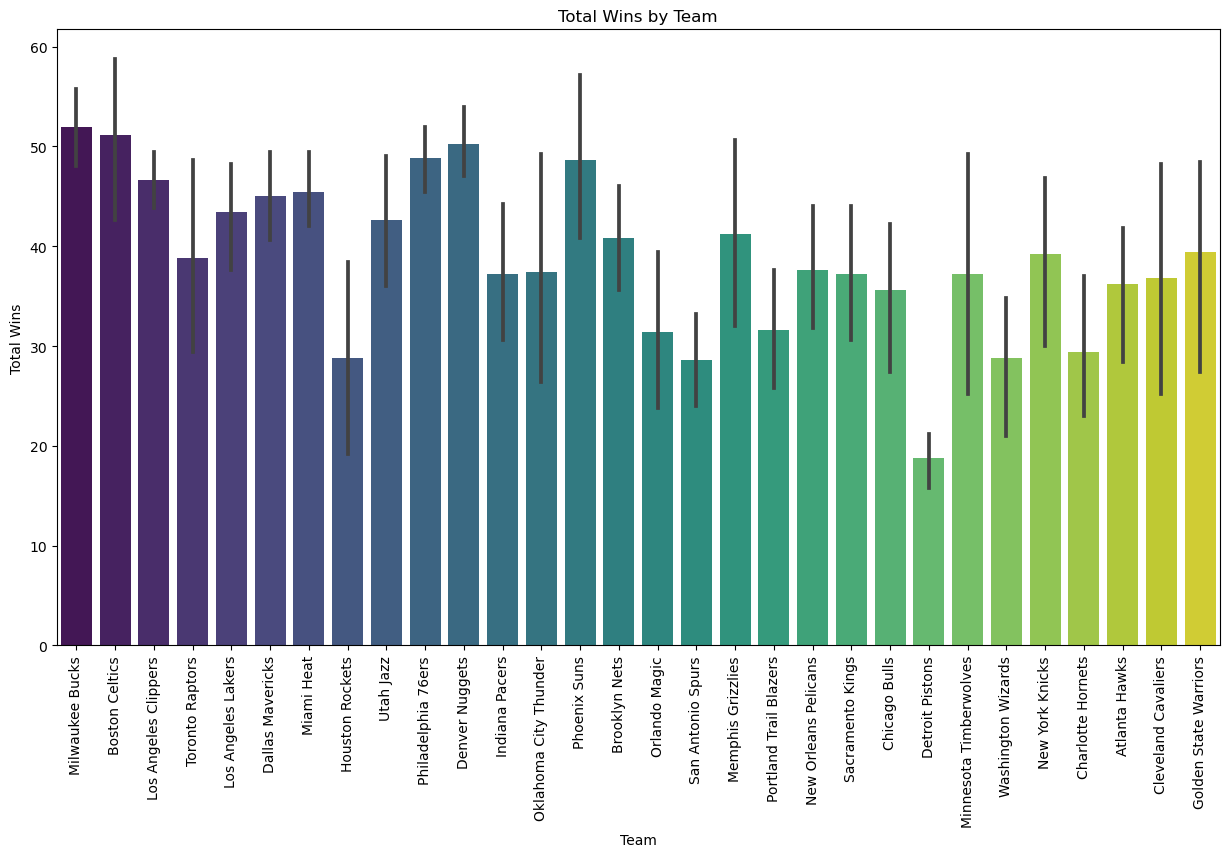

In [131]:
# Create the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Team', y='W', data=NBA_df, palette='viridis')

# Add titles and labels
plt.title('Total Wins by Team')
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.xticks(rotation=90)

# Show the plot
plt.show()

#plot shows the total wins of each team for the last 5 seasons

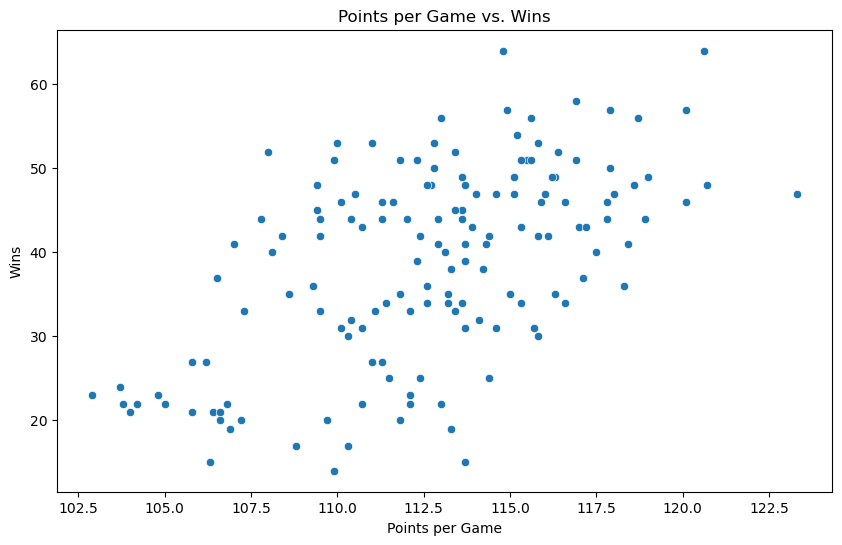

In [132]:
# Scatter plot of Points per Game vs. Wins
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PTS.o', y='W', data=NBA_df)
plt.title('Points per Game vs. Wins')
plt.xlabel('Points per Game')
plt.ylabel('Wins')
plt.show()
# plot shows a possible positive relationship between points gained per game and wins

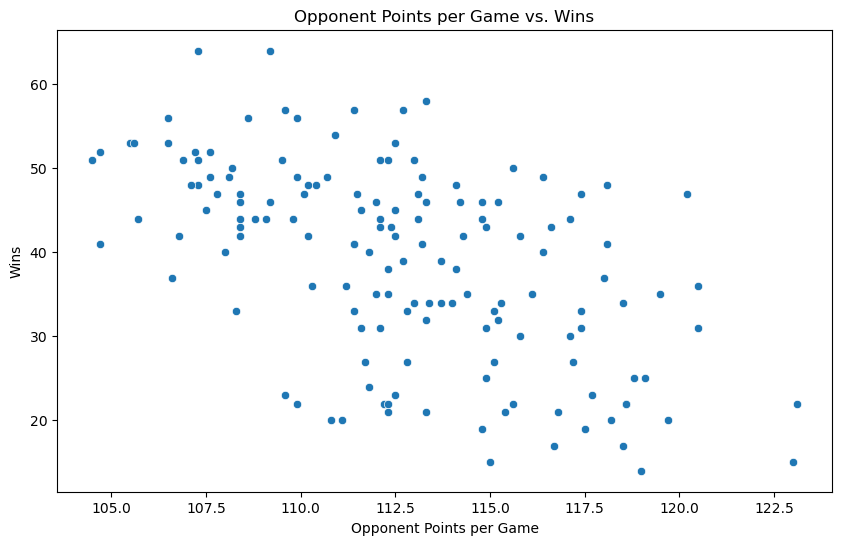

In [133]:
# Scatter plot of Points per Game vs. Wins
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PTS.d', y='W', data=NBA_df)
plt.title('Opponent Points per Game vs. Wins')
plt.xlabel('Opponent Points per Game')
plt.ylabel('Wins')
plt.show()
# plot shows a possible negative relationship between points allowed per game and wins

In [134]:
# Save dataframe as csv file
NBA_df.to_csv('NBA_df.csv', index=False)